In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
import nltk
import string
import matplotlib.pyplot as plt
import random
%matplotlib inline
import os

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import decomposition, ensemble
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

import joblib

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os,boto3,sys,glob,json

### Part 1  Loading the  data 

In [323]:
# the data processing and saving the 2000 charts are done in IBCdata_prepare4modeling_April022019.ipynb
#trainDF=pd.read_csv('ibc_trainingdata_040219.csv')  # pd.read_csv('/home/jovyan/work/TinaZ/ibc_trainingdata_040219.csv')
#testDF=pd.read_csv('ibc_testingdata_040219.csv')   #   pd.read_csv('/home/jovyan/work/TinaZ/ibc_testingdata_040219.csv')
testDF=pd.read_csv('testdata4comp_050619.csv')
print(len(testDF))

30624


In [3]:
testDF.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'chart_id', 'created_at', 'submission_id',
       'user_id', 'code_id', 'diagnosis_id', 'isActive', 'status', 'ai',
       'annotation_id', 'deleted', 'deleted_reason', 'end', 'evidence',
       'selectedText', 'start', 'text', '75bef', '75aft', '25wordsbef',
       '25wordsaft', 'label', 'flag', '75char', 'text75', 'cleaned_data'],
      dtype='object')

In [4]:
testDF.drop(['Unnamed: 0', 'Unnamed: 0.1'],inplace=True, axis=1)

In [5]:
testDF.head()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,0a15e297-211e-4337-b990-1ed031e44368,True,NaN,True,134b625f-5507-4b23-8544-2ed06336cc1c,...,Dysthymic disorder,"edema, no erythema. ASSESSMENT Diagnoses a...","[ICD-10: F34.1], [ICD-9: 300.4], [SNOMED: 786...","no masses, BS normal. Extremities: FROM, no de...","[ICD-10: F34.1], [ICD-9: 300.4], [SNOMED: 786...",agreed,1,"edema, no erythema. ASSESSMENT Diagnoses a...","edema, no erythema. ASSESSMENT Diagnoses a...",edema erythema assessment diagnoses attached e...
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,c3b4bacd-8b23-4cb1-9637-2d12afd702c3,True,NaN,True,bf0fb171-8ccb-4cff-b160-e13c28bc9e67,...,f34.1,MENT Diagnoses attached to this encounter: ...,"], [ICD-9: 300.4], [SNOMED: 78667006] Unspec...","normal. Extremities: FROM, no deformities, no ...","], [ICD-9: 300.4], [SNOMED: 78667006] Unspec...",agreed,1,MENT Diagnoses attached to this encounter: ...,MENT Diagnoses attached to this encounter: ...,ment diagnoses attached encounter dysthymic di...
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,18833cf3-b8e4-4623-81da-8df94629458a,True,NaN,True,4ba0d3bf-af6b-43dc-87c7-4be0d653e21d,...,e03.9,", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...","], [ICD-9: 244.9], [SNOMED: 40930008] Mixed h...",ASSESSMENT Diagnoses attached to this encou...,"], [ICD-9: 244.9], [SNOMED: 40930008] Mixed h...",agreed,1,", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...",", [ICD-9: 300.4], [SNOMED: 78667006] Unspeci...",icd9 3004 snomed 78667006 unspecified hypothyr...
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,6a6832d1-4976-4f8f-acdf-36079c004526,True,NaN,True,4321cd16-7060-4714-9a2e-19d8263ff6c8,...,Unspecified hypothyroidism,"Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...","[ICD-10: E03.9], [ICD-9: 244.9], [SNOMED: 409...",no erythema. ASSESSMENT Diagnoses attached...,"[ICD-10: E03.9], [ICD-9: 244.9], [SNOMED: 409...",agreed,1,"Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...","Dysthymic disorder [ICD-10: F34.1], [ICD-9: ...",dysthymic disorder icd10 f341 icd9 3004 snomed...
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E782,cba1d3fb-0c79-479b-a640-8a1886925ad9,True,NaN,True,b25c63b6-4802-4b31-a70f-b67b44eabe6b,...,Mixed hyperlipidemia,"cified hypothyroidism [ICD-10: E03.9], [ICD-9:...","[ICD-10: E78.2], [ICD-9: 272.2], [SNOMED: 267...",to this encounter: Dysthymic disorder [ICD-1...,"[ICD-10: E78.2], [ICD-9: 272.2], [SNOMED: 267...",agreed,1,"cified hypothyroidism [ICD-10: E03.9], [ICD-9:...","cified hypothyroidism [ICD-10: E03.9], [ICD-9:...",cified hypothyroidism icd10 e039 icd9 2449 sno...


In [324]:
# reverse it because it's reversed to the model
testDF['flag']=1-testDF['flag']

In [327]:
testDF['flag'].value_counts()

0    27353
1     3271
Name: flag, dtype: int64

In [328]:
testDF['label'].value_counts()

added      18334
agreed      9019
deleted     3271
Name: label, dtype: int64

In [325]:
testDF[['deleted','flag']].tail()

,deleted,flag
30619,False,0
30620,False,0
30621,False,0
30622,False,0
30623,False,0


In [329]:
len(testDF)

30624

In [330]:
nulltext=testDF[~pd.notnull(testDF['text'])] 
nulltext.head()

,Unnamed: 0,Unnamed: 0.1,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
676,1300,5475,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E119,701174f5-678b-4a1b-ad72-c93f3cce633e,True,confirmed,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
677,1301,5476,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,I10,9a8fc8c7-c891-4785-8864-dcd72804df24,True,undocumented,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
678,1302,5477,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E785,b61430c0-42ad-4fb6-9486-db11a4077069,True,undocumented,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
679,1303,5480,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,E119,f4549f74-7616-4f66-91f8-483d0b1d3bbf,True,confirmed,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN
680,1304,5481,IBXRMA2018_MULT_1216725170010001_HMK_191348266...,2019-04-25T07:30:32.257Z,04453921-a913-4899-82a7-0c545570c5c6,prashant.by.kumar,L409,2b0212b4-45f1-4e68-ab4a-8a0ded70e450,True,illegible,...,NaN,NaN,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,,'Kt NAME: DOE: DOB: PROGRESS NOTES A...,added,0,NaN,NaN,NaN


In [331]:
testDF = testDF[pd.notnull(testDF['text'])] 
len(testDF)

30277

In [332]:
nulltext=testDF[~pd.notnull(testDF['cleaned_data'])] 
nulltext.head()

,Unnamed: 0,Unnamed: 0.1,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,...,text,75bef,75aft,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data
71,376,944,IBXRMA2018_MULT_1218015600010001_HMK_3GM6V72QA...,2019-04-22T13:32:52.580Z,76735678-43d2-48d0-99eb-aa313a2090f8,ed.m.a.cabarrubias,N183,e70aa2d1-3bfb-4c57-b67e-821b13a0a78d,True,confirmed,...,"N18.3 Chronic kidney disease, stage 3 (moder...",NaN,"dney and Hypertension Assoc., P.C. Page 1 of 6...",,Mon 19 Nov 2018 11:19:17 AM EST215-741-351...,added,0,NaN,NaN,NaN
727,1385,5791,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,I480,ac0e0963-1fb9-4666-8ba2-0c0fbb8aebec,True,confirmed,...,Paroxysmal atrial anTation -148.0,NaN,POTTS. MICHAEL L eDoylestown Hea...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
732,1390,5806,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,I482,04f7ed73-d4af-41d3-b1ff-5c76750beae9,True,confirmed,...,Chmnic a-fib - L48.2,NaN,ary View for POTTS. MICHAEL L eD...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
734,1392,5813,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,D6869,4cbc92ed-e61e-4fa6-9ea5-af29e9f662a4,True,confirmed,...,Other thrombopinlia - D68.6g,NaN,for POTTS. MICHAEL L eDoylestow...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN
735,1393,5816,IBXRMA2018_MULT_1217794550010001_HMK_193348638...,2019-04-11T11:38:37.187Z,417b5472-d216-4033-8f07-d823ca12a6c0,m.melba.maria.james,D6869,349f3f18-372c-4850-8170-b207b2962d43,True,confirmed,...,Other thrombophilla,NaN,mary View for POTTS. MICHAEL L e...,,W15/2018 Summary View for POTTS. MICHAE...,added,0,NaN,NaN,NaN


In [333]:
testDF = testDF[pd.notnull(testDF['cleaned_data'])] 
len(testDF)

29124

In [29]:
testDF=testDF.reset_index(drop=True)
testDF.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,25wordsbef,25wordsaft,label,flag,75char,text75,cleaned_data,key,pred,prob
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,0.4 mg subl (one tablet under the tongue for c...,(ICD-414.01) (ICD10-125.10) Stable angina p...,added,0,ngue for chest pain may repeat in 5 minutes ma...,ngue for chest pain may repeat in 5 minutes ma...,ngue chest pain may repeat minutes maximum tim...,30619,0,0.001739
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,PA 19301 Phone: 610-647-4260 Fax: 610-647-74...,: Native Vessel : There are no ischemic sympto...,added,0,"Y F CORBETT DOB: 12/10/1967 Provider: LaPorte,...","Y F CORBETT DOB: 12/10/1967 Provider: LaPorte,...",corbett dob 12101967 provider laportesteven 10...,30620,0,0.008517
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,(ICD-414.01) (ICD10-125.10) Stable angina pe...,(ICD-272.2) (ICD10-E78.2). PHYSICAL EXAM ...,added,0,dysfunction (ICD-403.11) (ICD10-112.0) Edema...,dysfunction (ICD-403.11) (ICD10-112.0) Edema...,dysfunction icd40311 icd101120 edema icd7823 i...,30621,0,0.004384
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,Stable angina pectoris (ICD-413 9) Hyperten...,). PHYSICAL EXAM Vital Signs:BP: 130/84 mm...,added,0,Edema (ICD-782.3) (ICD1O-R60.9) Hyperlipidem...,Edema (ICD-782.3) (ICD1O-R60.9) Hyperlipidem...,edema icd7823 icd1or609 hyperlipidemia mixed i...,30622,0,0.003821
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,"controlled, will continue current therapy. He ...",": lab is pending, he continues to take Atorva...",added,0,"ollowed by Dr Han Edema: chronic Lymphedema,...","ollowed by Dr Han Edema: chronic Lymphedema,...",ollowed dr han edema chronic lymphedema eviden...,30623,0,0.000953


In [424]:
testDF['chart_id'].nunique()

813

#### select the instances not in AM's data

In [432]:
mytest =testDF[['chart_id', 'code_id','start','end']]
print(len(mytest))
mytest=mytest.drop_duplicates()
print(len(mytest))
mytest=mytest.sort_values(['chart_id', 'code_id','start','end'])

29124
28249


In [435]:
#change the columns name
mytest.rename(columns={'start':'start_offset'}, inplace=True)
mytest.rename(columns={'end':'end_offset'}, inplace=True)

In [426]:
len(amtestresult)

351925

In [427]:
AMuniquelist=amtestresult[['chart_id', 'code_id','start_offset','end_offset']]
print(len(AMuniquelist))
AMuniquelist=AMuniquelist.drop_duplicates()
print(len(AMuniquelist))

351925
23130


In [433]:
AMuniquelist=AMuniquelist.sort_values(['chart_id', 'code_id','start_offset','end_offset'])

In [436]:
overlap = pd.merge(mytest,AMuniquelist, how='inner', on = ['chart_id','code_id','start_offset','end_offset'])
len(overlap)

11994

In [438]:
notinAM=pd.concat([mytest,overlap]).drop_duplicates(keep=False)
print(len(notinAM))

16255


In [442]:
notinAM.to_csv('ztinstancesnotinAM.csv')

In [443]:
notinZT=pd.concat([AMuniquelist,overlap]).drop_duplicates(keep=False)
print(len(notinZT))

11136


In [444]:
notinZT.to_csv('AMinstancesnotinzt.csv')

In [440]:
testDF1=testDF.copy()

In [441]:
testDF1.rename(columns={'start':'start_offset'}, inplace=True)
testDF1.rename(columns={'end':'end_offset'}, inplace=True)
testDF1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'chart_id', 'created_at', 'submission_id',
       'user_id', 'code_id', 'diagnosis_id', 'isActive', 'status', 'ai',
       'annotation_id', 'deleted', 'deleted_reason', 'end_offset', 'evidence',
       'selectedText', 'start_offset', 'text', '75bef', '75aft', '25wordsbef',
       '25wordsaft', 'label', 'flag', '75char', 'text75', 'cleaned_data'],
      dtype='object')

### Part 2 Loading all the models or locate the directory

#### Part 2.a. Load the 28 pickle files and run them on the testDF with selected chart_ids

In [14]:
files=glob.glob("../picklefolder_ngrams/refreshed_models/*19.pickle")

In [15]:
files

['../picklefolder_ngrams/refreshed_models/Phrase_stroke_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_emphysema_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_hypertension_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_dementia_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_cholesterol_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_cad_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Phrase_aneurysm_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_COPD_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_Depression_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_Diabetes_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_Heart_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_Kidney_LRApril0219.pickle',
 '../picklefolder_ngrams/refreshed_models/Code_Model1_LRApril0219.pi

In [16]:
len(files)

28

In [19]:
files[21].split('/')[3].split('_')[1]

'diabetes'

In [20]:
files[1].split('/')[3]

'Phrase_emphysema_LRApril0219.pickle'

### Part 3. Apply models to test data

In [21]:
encoder = preprocessing.LabelEncoder()
test_y = encoder.fit_transform(testDF['flag'])  # for independent testing on 2000 charts
#test_x=testDF['cleaned_data']

In [22]:
code_list={}
code_list["Model1"]=['I10','E119']
code_list["Model2"]=['I2510','E785','K219','F329','I639']
code_list["Model3"]=['I739','N183','Z992','B20','I213','R569','I43','J410','I714','R579','E550','I209','J45998','I480','B182','K210','K739']
code_list["Heart"]=['I509','I482','I4891','I82401']
code_list["Depression"]=['F411','F410','F40240','F458','F409','F4000','F4001','F445','F444','F40243','F446','F4010','F442','F408','F449','F451']
code_list["Kidney"]=['N189','N181','N182','E1122','I130','E0822','E1022']
code_list["Diabetes"]=['Z794','E109','E119','E139','E089','E099']
code_list["Cancer"]=['C801','C50919','C189']
code_list["COPD"]=['J449','J45909']
code_list["Cholesterol"]=['E780','E785','E782','E789','E7800','E784','E781','E7801','E7881','E882','E783','E786','E7889','E756','E755','E7130']

In [30]:
allpredict=pd.DataFrame()   # create an empty dataframe, to save the prediction result for each model
allprob=pd.DataFrame()
print(allpredict)

Empty DataFrame
Columns: []
Index: []


In [31]:
f = open("allmodeltestscore_0506.txt", "w+")  # save all the score to this file

indexdf=pd.DataFrame()    # create a dataframe, otherwise can use testDF for merging to obtain the prediction matched to index
# because for some model testing, we only select partial data, like phrase-based model, code-based model
for i in range(len(files)):
    model_pipeline = joblib.load(files[i])
    f = open("allmodeltestscore_0506.txt", "a+")
    # deletion model
    if(files[i].split('/')[3].startswith('D')):
        try:
            testDF1=testDF
            indexdf[i]= [1 for i in range(len(testDF))]
        except:
            print('no data for this model')
        
    elif(files[i].split('/')[3].startswith('P')):
    # if it's phrase-based model, use the following way to select data
        
        phrase=files[i].split('/')[3].split('_')[1]
        try:
            testDF1 = testDF[testDF['text'].str.contains(phrase,flags=re.IGNORECASE)]
            temp=testDF1.index.tolist()
            indexdf[i]=[1 if i in (temp) else 0 for i in range(len(testDF))]
        except:
            print('no data for this model')

    elif(files[i].split('/')[3].startswith('C')):
    # if it's code based model, use the following way to select model
        codereason=files[i].split('/')[3].split('_')[1]
        try:
            testDF1 = testDF[testDF['code_id'].isin(code_list[codereason])]
            temp=testDF1.index.tolist()
            indexdf[i]=[1 if i in (temp) else 0 for i in range(len(testDF))]
        except:
            print('no data for this model')
    else:
        print('not a valid/good model name probably...')

    #print(files[i])
    # how to put the prediction on the right index?
    test=testDF1['cleaned_data']
    prediction = model_pipeline.predict(test)
    proba = model_pipeline.predict_proba(test)[:,1]
    #y_pred = []   # choose the probability for predicting 1 that's the second column
    #for row in pred:
   #     y_pred.append(row[1])
   # y_pred = np.array(y_pred)
    
    testDF1['key']=testDF1.index
    testDF1['pred']=prediction
    testDF1['prob']= proba
    
    indexdf['key']=indexdf.index
    merged=pd.merge(indexdf,testDF1,on='key',how='outer')  # maintain the position of the perdiction, match to the right index
    allpredict[i]=merged['pred']    # save the prediction to corresponding dataframe
    allprob[i]=merged['prob']   # save the probability
    
    # the following just generate accuracy report for each model
    conf_mat = confusion_matrix(testDF1['flag'], prediction)
    df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
    #sns.set(font_scale=1.4)#for label size
    #sns.heatmap(df_cm, annot=True, fmt='d')
    #print(classification_report(prediction, testDF1['flag']))
    #conf_mat = confusion_matrix(test_y, allpredict1)
    tn, fp, fn, tp = conf_mat.ravel()
    report = classification_report(testDF1['flag'], prediction)
    lines = report.split('\n')
    #print(lines[2])
    row_data = lines[3].split('      ')
    print("testing model:",(files[i]))
    print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
    print(accuracy_score(testDF1['flag'],prediction),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)  
    
    f.write("testing model: %s\n" % files[i])
    f.write("accuracy_score recall precision  f1_score tn  fn  fp  tp\n")
    f.write("%f %f %f %f %f %f %f %f \n" % (accuracy_score(testDF1['flag'],prediction),float(row_data[2]),float(row_data[3]),float(row_data[4]), tn, fn, fp, tp)) 
#print(allpredict)
#f.close()

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_stroke_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.3333333333333333  0.33 1.00 0.50 0 0 2 1
testing model: ../picklefolder_ngrams/refreshed_models/Phrase_emphysema_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7777777777777778  0.10 0.12 0.11 55 7 9 1


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_hypertension_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.872207327971403  0.32 0.02 0.03 3895 553 19 9


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_dementia_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.868421052631579  0.00 0.00 0.00 132 9 11 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_cholesterol_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8629629629629629  0.00 0.00 0.00 466 42 32 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_cad_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8471337579617835  0.03 0.07 0.04 265 14 34 1


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_aneurysm_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7394366197183099  0.00 0.00 0.00 105 17 20 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_COPD_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7851912123677787  0.04 0.02 0.02 962 191 73 3


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Depression_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7909090909090909  0.00 0.00 0.00 87 9 14 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Diabetes_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7992351816443595  0.09 0.19 0.12 1233 90 225 21


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Heart_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8206388206388207  0.10 0.15 0.12 658 57 89 10


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Kidney_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8258928571428571  0.03 0.10 0.05 368 18 60 2


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Model1_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8420981295744104  0.07 0.02 0.03 6195 909 256 18


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Cancer_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7469879518072289  0.05 0.33 0.09 61 2 19 1


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Cholesterol_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8560509554140128  0.09 0.02 0.03 4023 589 89 9


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Model2_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8435988390841664  0.14 0.05 0.08 5192 716 254 40


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your 

testing model: ../picklefolder_ngrams/refreshed_models/Code_Model3_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8623578695391981  0.07 0.03 0.04 1436 166 64 5


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_asthma_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8662613981762918  0.00 0.00 0.00 285 37 7 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_cancer_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.5862068965517241  0.10 0.50 0.17 63 5 43 5


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_ckd_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.96  0.00 0.00 0.00 216 8 1 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_depression_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7246376811594203  0.52 0.62 0.57 188 38 57 62


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.19.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/Phrase_diabetes_LRApril0219.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.875  0.04 0.03 0.03 1634 144 90 4


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_preventative_screening_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8881334981458591  0.56 0.02 0.03 25807 3211 47 59


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_phoneORaddressORother_number_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8876871308886142  0.00 0.00 0.00 25853 3270 1 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_not_relevant_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8855926383738497  0.16 0.00 0.01 25777 3255 77 15


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_not_doctors_note_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8874467792885593  0.10 0.00 0.00 25845 3269 9 1


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_negation_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8866227166597995  0.00 0.00 0.00 25822 3270 32 0


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your ow

testing model: ../picklefolder_ngrams/refreshed_models/DeletionReason_family_history_RFMay0119.pickle
accuracy_score recall precision  f1_score tn  fn  fp  tp
0.8872407636313693  0.15 0.00 0.00 25837 3267 17 3


####  Part 2.b. Now get the prediction and probability dataframes and merge with testDF which has all the chart_id etc info

In [32]:
allpredict.isnull().sum()  # a lot of nulls because not all data are run for each model

0     29121
1     29052
2     24648
3     28972
4     28584
5     28810
6     28982
7     27895
8     29014
9     27555
10    28310
11    28676
12    21746
13    29041
14    24414
15    22922
16    27453
17    28795
18    29008
19    28899
20    28779
21    27252
22        0
23        0
24        0
25        0
26        0
27        0
dtype: int64

In [33]:
allpredict.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [34]:
allprob.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.005479,0.001998,0.027287,0.006092,0.003369,0.001188
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003676,0.001736,0.027066,0.015197,0.001653,0.001665
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000433,0.001193,0.024220,0.008496,0.000926,0.001022
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000632,0.001053,0.017515,0.005012,0.000941,0.001216
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000631,0.001187,0.018536,0.014897,0.001670,0.001806


In [35]:
len(allpredict)

29124

In [36]:
len(testDF)

29124

In [37]:
# the data frame for predictions from each model
#merge to testDF to keep the Nan, which means not omputed for that instance
#testDF2=pd.concat([testDF,allpredict],axis=1)
#len(testDF2)
testDF['index']=testDF.index
allpredict['index']=allpredict.index
df_pred = pd.merge(testDF,allpredict, how='left', on = 'index')
len(df_pred)

29124

In [39]:
df_pred.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,18,19,20,21,22,23,24,25,26,27
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [40]:
# now the data frame with probabilities
testDF['index']=testDF.index
allprob['index']=allprob.index
df_prob = pd.merge(testDF,allprob, how='left', on = 'index')
print(len(df_prob))

29124


In [42]:
df_prob.tail()

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,18,19,20,21,22,23,24,25,26,27
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,NaN,NaN,NaN,NaN,0.003129,0.003108,0.088019,0.010956,0.033337,0.001739
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,NaN,NaN,NaN,NaN,0.002496,0.013972,0.127496,0.013717,0.024199,0.008517
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,NaN,NaN,NaN,NaN,0.009587,0.011952,0.101208,0.028377,0.011392,0.004384
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,NaN,NaN,NaN,NaN,0.009488,0.022438,0.086748,0.043146,0.009061,0.003821
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,NaN,NaN,NaN,NaN,0.002758,0.002940,0.028633,0.007133,0.119949,0.000953


#### Part 2.c. Now combine the prediction from 28 models to make one prediction,it's actually an or operation, but here using sum()

In [43]:
allprob.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.005479,0.001998,0.027287,0.006092,0.003369,0.001188,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.003676,0.001736,0.027066,0.015197,0.001653,0.001665,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000433,0.001193,0.024220,0.008496,0.000926,0.001022,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000632,0.001053,0.017515,0.005012,0.000941,0.001216,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000631,0.001187,0.018536,0.014897,0.001670,0.001806,4


In [44]:
allpredictNan=allpredict   # keep the original NaN if that row is not computed for that model
allpredict=allpredict.fillna(0) # fill the NaNs by zero

In [45]:
allpredictNan.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,4


In [46]:
#allpredict=allpredictNan
#allpredict=allpredict.fillna(0)
allpredict.drop(['index'],inplace=True, axis=1)
allpredict.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [47]:
allpredict['Sum'] = allpredict.sum(axis = 1, skipna = True) 
df_pred['all_model_pred']=[1 if allpredict['Sum'].iloc[i]>=1 else 0 for i in range(len(allpredict))] 

In [51]:
# check how many 1s are predicted 
allpredict1=df_pred['all_model_pred']
print(sum(allpredict1))
print(len(allpredict1))  # only a small percentage are predicted as deletion

1551
29124


In [53]:
df_pred.tail()
#all_model_pred is check any model output is 1 for that instance

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,19,20,21,22,23,24,25,26,27,all_model_pred
29119,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,0bb388c3-d58c-42ec-8137-b1d3ad33be0e,True,confirmed,False,3c6c5fea-348f-41b8-a215-d2ac3f350887,...,NaN,NaN,NaN,0,0,0,0,0,0,0
29120,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,I2510,527c88fa-cb14-4896-bd4d-1cb33ac99321,True,confirmed,False,9566c5a3-477b-49e7-918c-8fbfcc125701,...,NaN,NaN,NaN,0,0,0,0,0,0,0
29121,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,3002a4a5-52f5-4447-81c6-19a74c85013f,True,confirmed,False,4b97e826-b7a6-4a49-b785-db9444e3d3af,...,NaN,NaN,NaN,0,0,0,0,0,0,0
29122,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,83d1c86c-4e5e-47c4-b987-fa9f2d19853b,True,confirmed,False,5048421c-f504-4be8-aa27-a9cb1d5a1538,...,NaN,NaN,NaN,0,0,0,0,0,0,0
29123,IBXRMA2018_MULT_1197832420010001_HMK_8TF2T50JY...,2019-03-20T09:33:51.664Z,43e3f090-80fb-484b-970a-5923d9187654,syam.babu.sambasivan,E782,c27046c1-174c-43bd-8012-73ff54dbdc7f,True,confirmed,False,ec4616f3-ba0b-4cd1-847b-09a7dcd7c212,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [54]:
df_pred.columns

Index([      'chart_id',     'created_at',  'submission_id',        'user_id',
              'code_id',   'diagnosis_id',       'isActive',         'status',
                   'ai',  'annotation_id',        'deleted', 'deleted_reason',
                  'end',       'evidence',   'selectedText',          'start',
                 'text',          '75bef',          '75aft',     '25wordsbef',
           '25wordsaft',          'label',           'flag',         '75char',
               'text75',   'cleaned_data',            'key',           'pred',
                 'prob',          'index',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,          

In [55]:
df_prob.columns

Index([      'chart_id',     'created_at',  'submission_id',        'user_id',
              'code_id',   'diagnosis_id',       'isActive',         'status',
                   'ai',  'annotation_id',        'deleted', 'deleted_reason',
                  'end',       'evidence',   'selectedText',          'start',
                 'text',          '75bef',          '75aft',     '25wordsbef',
           '25wordsaft',          'label',           'flag',         '75char',
               'text75',   'cleaned_data',            'key',           'pred',
                 'prob',          'index',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,          

In [56]:
# drop the key and predict prob temp columns
df_pred.drop(['key','pred','prob'],inplace=True, axis=1)
df_prob.drop(['key','pred','prob'],inplace=True, axis=1)

In [57]:
# rename the columns names
col_dict = {0: 'Phrase_stroke', 1: 'Phrase_emphysema',2:'Phrase_hypertension',3:'Phrase_dementia',4:'Phrase_cholesterol',
           5:'Phrase_cad',6:'Phrase_aneurysm',7:'Code_COPD',8:'Code_Depression',9:'Code_Diabetes',10:'Code_Heart',
           11:'Code_Kidney',12:'Code_Model1',13:'Code_Cancer',14:'Code_Cholesterol',15:'Code_Model2',
           16:'Code_Model3',17:'DeletionReason_family_history',18:'DeletionReason_negation',19:'DeletionReason_not_doctors_note',
           20:'DeletionReason_not_relevant',21:'DeletionReason_phoneORaddressORother_number',22:'DeletionReason_preventative_screening',
           23:'Phrase_asthma',24:'Phrase_cancer',25:'Phrase_ckd',26:'Phrase_depression',27:'Phrase_diabetes'}   ## key→old name, value→new name

df_pred.columns = [col_dict.get(x, x) for x in df_pred.columns]
df_prob.columns = [col_dict.get(x, x) for x in df_prob.columns]

In [58]:
df_pred.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end', 'evidence', 'selectedText', 'start', 'text',
       '75bef', '75aft', '25wordsbef', '25wordsaft', 'label', '75char',
       'text75', 'cleaned_data', 'index', 'Phrase_stroke', 'Phrase_emphysema',
       'Phrase_hypertension', 'Phrase_dementia', 'Phrase_cholesterol',
       'Phrase_cad', 'Phrase_aneurysm', 'Code_COPD', 'Code_Depression',
       'Code_Diabetes', 'Code_Heart', 'Code_Kidney', 'Code_Model1',
       'Code_Cancer', 'Code_Cholesterol', 'Code_Model2', 'Code_Model3',
       'DeletionReason_family_history', 'DeletionReason_negation',
       'DeletionReason_not_doctors_note', 'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_asthma',
       'Phrase_cancer', 'Phrase_ckd', 'Phrase_depression', 'Phrase_diabetes',
 

In [59]:
df_prob.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end', 'evidence', 'selectedText', 'start', 'text',
       '75bef', '75aft', '25wordsbef', '25wordsaft', 'label', '75char',
       'text75', 'cleaned_data', 'index', 'Phrase_stroke', 'Phrase_emphysema',
       'Phrase_hypertension', 'Phrase_dementia', 'Phrase_cholesterol',
       'Phrase_cad', 'Phrase_aneurysm', 'Code_COPD', 'Code_Depression',
       'Code_Diabetes', 'Code_Heart', 'Code_Kidney', 'Code_Model1',
       'Code_Cancer', 'Code_Cholesterol', 'Code_Model2', 'Code_Model3',
       'DeletionReason_family_history', 'DeletionReason_negation',
       'DeletionReason_not_doctors_note', 'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_asthma',
       'Phrase_cancer', 'Phrase_ckd', 'Phrase_depression', 'Phrase_diabetes'],


In [60]:
df_pred.rename(columns={'start': 'start_offset', 'end': 'end_offset'}, inplace=True)

In [61]:
df_pred[['chart_id','start_offset','end_offset','DeletionReason_family_history']].head()

,chart_id,start_offset,end_offset,DeletionReason_family_history
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8494,8512,NaN
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8522,8527,NaN
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8603,8608,NaN
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8567,8593,NaN
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8647,8667,NaN


In [62]:
df_prob.rename(columns={'start': 'start_offset', 'end': 'end_offset'}, inplace=True)
df_prob[['chart_id','start_offset','end_offset','DeletionReason_family_history']].head()  #ok make sense

,chart_id,start_offset,end_offset,DeletionReason_family_history
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8494,8512,NaN
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8522,8527,NaN
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8603,8608,NaN
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8567,8593,NaN
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,8647,8667,NaN


In [63]:
#df_pred.to_csv('preddataforcompwithAM_0506.csv')   #  with prediction for each model and all model combined
#df_prob.to_csv('probdataforcompwithAM_0506.csv')   #  with probability for each model
# finally corrected a lot of errors like index not reset issue

In [67]:
print(len(set(df_pred['chart_id'].tolist())))
print(len(set(df_prob['chart_id'].tolist())))   # 813 unique chart ids

813
813


In [ ]:
# save a html copy
'''
!jupyter nbconvert --to html allmodels_result_April05.ipynb
'''

###  Part 3. Load in AM's test result

#### Part 3.a. Load in the chart list file from AM

In [64]:
chartlist=pd.read_csv('newmodel_charts2.csv')

In [65]:
chart_list=chartlist['chart_id'].tolist()

In [66]:
print(len(set(chart_list)))    # 1044 unique chart is

1044


#### Part 3.b. Load in AM pipeline result data

In [386]:
amtestresult=pd.read_csv('modeloutput_testcharts_05072019.csv')

In [387]:
amtestresult.head()

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
0,0,IBXRMA2018_MULT_1218050520010001_HMK_209328614...,E781,10867,0,DeleteReason_Phone,e78.1,0.24,10862
1,1,IBXRMA2018_MULT_1218027810010001_HMK_5C19P96EM...,I10,463,0,Code_Model1,benign hypertension,0.26,444
2,2,IBXRMA2018_MULT_1217360100010001_HMK_031266271...,E042,24616,0,DeleteReason_Phone,meds Nontoxic multinodular goiter,0.34,24588
3,3,IBXRMA2018_MULT_1218043480010001_HMK_211248182...,E039,22623,0,DeletionReason_preventative_screening,e03.9: hypothyroidism unspecified,0,22589
4,4,IBXRMA2018_MULT_1216863420010001_HMK_210280001...,F329,350985,0,Code_Model2,plasma simvastatin 20 mg tablet Knee pain ...,0.4,350975


In [70]:
print(amtestresult['model_name'].nunique())
print(len(amtestresult))
print(amtestresult['chart_id'].nunique())

48
351925
1313


In [71]:
# select the data for this list only
amtestresult=amtestresult[amtestresult['chart_id'].isin(chart_list)==True]

In [72]:
print(amtestresult['model_name'].nunique())
print(len(amtestresult))
print(amtestresult['chart_id'].nunique())   # 913 unqiue chart_ids

47
243191
913


In [76]:
# need to reset index
amtestresult=amtestresult.reset_index(drop=True)
amtestresult.tail()  # now looks right

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
243186,351919,IBXRMA2018_MULT_1218053490010001_HMK_197301926...,E119,9875,0,DeleteReason_FamilyHistory,diabetes,0.01,9867
243187,351920,IBXRMA2018_MULT_1216863420010001_HMK_210280001...,I10,136595,0,DeleteReason_Phone,essential hypertension,0.27,136573
243188,351921,IBXRMA2018_MULT_1216882150010001_HMK_184302907...,I10,34272,0,DeletionReason_Screening,"with hypertension,",0,34260
243189,351923,IBXRMA2018_MULT_1217119770010001_HMK_6P89TC2FJ...,I10,21281,0,DeletionReason_not_relevant,HTN,0.03,21278
243190,351924,IBXRMA2018_MULT_1217578900010001_HMK_181288528...,I10,26735,0,Code_Model1,essential hypertension,0.01,26713


In [78]:

print(len(amtestresult[amtestresult['model_name'].str.contains('DeleteReason')==True]))
print(len(amtestresult[amtestresult['model_name'].str.contains('DeletionReason')==True]))
print(len(amtestresult[amtestresult['model_name'].str.contains('Phrase')==True]))
print(len(amtestresult[amtestresult['model_name'].str.contains('Code')==True]))
print(len(amtestresult[amtestresult['model_name'].str.contains('exclusion')==True]))
print("number of rows:",len(amtestresult))
print(47625+158750+8912+27904+0)    # verify it covers all cases, looks alright

47625
158750
8912
27904
0
number of rows: 243191
243191


In [94]:
# testing there are duplicate with different model versions
print(len(amtestresult[amtestresult['model_name'].str.contains('DeletionReason_not_doctors_note')==True]))  #
print(len(amtestresult[amtestresult['model_name'].str.contains('DeletionReason_DoctorsNote')==True]))  #
temptest=amtestresult[amtestresult['model_name'].str.contains('DeletionReason_DoctorsNote')==True]
temptest2=amtestresult[amtestresult['model_name'].str.contains('DeletionReason_not_doctors_note')==True]
#temptest.head()
temptest =temptest.sort_values(['chart_id', 'code_id','start_offset','end_offset'])
temptest2 =temptest2.sort_values(['chart_id', 'code_id','start_offset','end_offset'])
print(len(temptest))
#temptest[['chart_id']].drop_duplicates(subset=None, keep='first', inplace=True)
print(len(temptest2)) # ok so there are different instances #, no duplicate actually

15875
15875
15875
15875


In [95]:
temptest.head()

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
89648,130647,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,3490,0,DeletionReason_DoctorsNote,Goiter,0.14,3484
22326,32532,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,10299,0,DeletionReason_DoctorsNote,Goiter,0.14,10293
81760,119182,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,3538,0,DeletionReason_DoctorsNote,hyperlipidemia (272.4) (e78.5,0.28,3509
196238,284869,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,10347,0,DeletionReason_DoctorsNote,hyperlipidemia (272.4) (e78.5,0.28,10318
193370,280652,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,G309,8352,0,DeletionReason_DoctorsNote,senile dementia,0.01,8337


In [96]:
temptest2.head()

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
136309,198061,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,3490,0,DeletionReason_not_doctors_note,Goiter,0.02,3484
148532,215755,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,10299,0,DeletionReason_not_doctors_note,Goiter,0.02,10293
34033,49624,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,3538,0,DeletionReason_not_doctors_note,hyperlipidemia (272.4) (e78.5,0.05,3509
238188,344844,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,10347,0,DeletionReason_not_doctors_note,hyperlipidemia (272.4) (e78.5,0.05,10318
221458,321379,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,G309,8352,0,DeletionReason_not_doctors_note,senile dementia,0.01,8337


In [89]:
print(len(set(temptest['chart_id'].unique().tolist()))) # 913 unique chart_ids 

913


In [116]:
# NOw check a code model, 

temptest=amtestresult[amtestresult['model_name'].str.contains('Code_Depression')==True]
print(len(temptest))
#temptest.head()
temptest =temptest.sort_values(['chart_id', 'code_id','start_offset','end_offset'])


122


In [117]:
temptest.head(6)

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
971,1424,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,516,0,Code_Depression,follow-up chronic conditions Problems Agor...,0.11,485
12668,18496,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,516,0,Code_Depression,follow-up chronic conditions Problems Agor...,0.49,485
50177,73194,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,12264,0,Code_Depression,agoraphobia with panic disorder,0.4,12233
163955,238093,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,12264,0,Code_Depression,agoraphobia with panic disorder,0.15,12233
11474,16749,IBXRMA2018_MULT_1166968740010001_HMK_197461829...,F411,11209,0,Code_Depression,generalized anxiety disorder - f41.1,0.03,11173
28074,40892,IBXRMA2018_MULT_1166968740010001_HMK_197461829...,F411,11209,0,Code_Depression,generalized anxiety disorder - f41.1,0.06,11173


In [118]:
print(len(temptest))
temptest.drop_duplicates(subset=['chart_id','code_id','start_offset','end_offset'],keep='last', inplace=True)
print(len(temptest))

122
61


In [119]:
temptest.head()

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
12668,18496,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,516,0,Code_Depression,follow-up chronic conditions Problems Agor...,0.49,485
163955,238093,IBXRMA2018_MULT_1163375140010001_HMK_161144891...,F4001,12264,0,Code_Depression,agoraphobia with panic disorder,0.15,12233
28074,40892,IBXRMA2018_MULT_1166968740010001_HMK_197461829...,F411,11209,0,Code_Depression,generalized anxiety disorder - f41.1,0.06,11173
168201,244163,IBXRMA2018_MULT_1166968740010001_HMK_197461829...,F411,15302,0,Code_Depression,Generalized anxiety disorder Refill Xanax Ta...,0.18,15274
192796,279836,IBXRMA2018_MULT_1166968740010001_HMK_197461829...,F411,28415,0,Code_Depression,generalized anxiety disorder - f41.1,0.06,28379


####  the above result show that different deletion models are mixed together, prediction from both refreshed and old models are both generateddeletion based models and phrased based can be differentiated, but Code based have the same names So it's hard to tell where they are from

#### Part. 3.c. Cleaning data, removing duplicate model_names etc

In [100]:
amtestresult['model_name'].unique()

array(['DeleteReason_Phone', 'DeletionReason_preventative_screening',
       'Code_Model2', 'Code_Cholesterol', 'DeleteReason_FamilyHistory',
       'DeletionReason_NotRelevant', 'DeletionReason_family_history',
       'Phrase_hypertension', 'DeletionReason_Negation',
       'DeletionReason_negation',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_not_doctors_note', 'Code_Model3',
       'DeletionReason_Screening', 'DeleteReason_PMH',
       'DeletionReason_not_relevant', 'Code_COPD',
       'DeletionReason_DoctorsNote', 'Phrase_diabetes', 'Code_Model1',
       'Phrase_Hypertension', 'Phrase_Ckd', 'Phrase_Diabetes',
       'Phrase_Asthma', 'Code_Diabetes', 'Code_Depression', 'Phrase_CAD',
       'Phrase_cholesterol', 'Phrase_Cholesterol', 'Phrase_asthma',
       'Code_Cancer', 'Code_Heart', 'Phrase_ckd', 'Phrase_depression',
       'Phrase_Depression', 'Code_Kidney', 'Phrase_dementia',
       'Phrase_Dementia', 'Phrase_cad', 'Phrase_Cancer',
       'Phrase

In [101]:
# select erfreshed model names code model name
#convert names to the same if it shows different version, upper case vs lower case
# or try a version to delete those to be replaced instances
#amtestresult['model_name'].replace(['Phrase_Stroke'], 'Phrase_stroke', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Emphysema'], 'Phrase_emphysema', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Hypertension'], 'Phrase_hypertension', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Dementia'], 'Phrase_dementia', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Cholesterol'], 'Phrase_cholesterol', inplace=True)
#amtestresult['model_name'].replace(['Phrase_CAD'], 'Phrase_cad', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Aneurysm'], 'Phrase_aneurysm', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Asthma'], 'Phrase_asthma', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Cancer'], 'Phrase_cancer', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Ckd'], 'Phrase_ckd', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Depression'], 'Phrase_depression', inplace=True)
#amtestresult['model_name'].replace(['Phrase_Diabetes'], 'Phrase_diabetes', inplace=True)
# remove those from current pickle files in pipleline, non-refreshed models
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Stroke')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Emphysema')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Hypertension')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Dementia')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Cholesterol')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_CAD')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Aneurysm')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Asthma')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Cancer')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Ckd')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Depression')==False)]
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('Phrase_Diabetes')==False)] 
# I'm not sure they are from diffrent models run, if yes, I need to remove them instead of changing the names
#amtestresult['model_name'].replace(['DeleteReason_FamilyHistory'], 'DeletionReason_family_history', inplace=True)
#amtestresult['model_name'].replace(['DeletionReason_Negation'], 'DeletionReason_negation', inplace=True)
#amtestresult['model_name'].replace(['DeletionReason_DoctorsNote'], 'DeletionReason_not_doctors_note', inplace=True)
#amtestresult['model_name'].replace(['DeletionReason_NotRelevant'], 'DeletionReason_not_relevant', inplace=True)
#amtestresult['model_name'].replace(['DeleteReason_Phone'], 'DeletionReason_phoneORaddressORother_number', inplace=True)
#amtestresult['model_name'].replace(['DeletionReason_Screening'], 'DeletionReason_preventative_screening', inplace=True)
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeleteReason_FamilyHistory')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeletionReason_Negation')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeletionReason_DoctorsNote')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeletionReason_NotRelevant')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeleteReason_Phone')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeletionReason_Screening')==False)] 
# remove #exclusion, and PMH models because we are not comparing them
#amtestresult=amtestresult[(amtestresult['model_name'].str.contains('exclusion')==False)] 
amtestresult=amtestresult[(amtestresult['model_name'].str.contains('DeleteReason_PMH')==False)]
print(len(amtestresult))
#print(len(amtestresult[amtestresult['model_name'].str.contains('Phrase_Cholesterol')==True]))  

127610


In [102]:
print(len(amtestresult)) # the duplicated computation from pipeline and refreshed models are removed for deletion based and 
# phrase based, but not code based, so it will generate some confusion later

127610


In [131]:
# remove those code based data from amtestresult
nonecoderesult=amtestresult[amtestresult['model_name'].str.contains('Code_')==False]
len(nonecoderesult)

99706

In [128]:
temptest=amtestresult[amtestresult['model_name'].str.contains('Code_')==True]
temptest =temptest.sort_values(['chart_id', 'code_id','start_offset','end_offset','model_name'])
len(temptest)

27904

In [129]:
temptest.tail(6)

,Unnamed: 0,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
145237,211003,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11022,0,Code_Model1,essential (primary) hypertension,0.09,10990
218861,317625,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11022,0,Code_Model1,essential (primary) hypertension,0.07,10990
27274,39740,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11044,0,Code_Model1,(primary) hypertension HIGH BLOOD PRESSURE,0.23,11025
64696,94406,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11044,0,Code_Model1,(primary) hypertension HIGH BLOOD PRESSURE,0.46,11025
135319,196621,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,Code_Model2,cerebrovascular accident,0.44,4869
190623,276753,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,Code_Model2,cerebrovascular accident,0.31,4869


In [130]:
temptest.drop_duplicates(subset=['chart_id','code_id','start_offset','end_offset','model_name'],keep='last', inplace=True)
len(temptest)  # it's strange, I thought only reduce half, but there are 215 only single instance

14167

In [132]:
# now concate the non-code with code based result
amtestresult2=pd.concat([nonecoderesult,temptest])
len(amtestresult2)

113873

In [135]:
print(amtestresult2['chart_id'].nunique())

913


In [134]:
amtestresult2['model_name'].nunique()

28

In [142]:
amtestresult2=amtestresult2.drop(['Unnamed: 0'], axis=1)

In [144]:
amtestresult2 = amtestresult2.sort_values(['chart_id', 'code_id','start_offset','end_offset','model_name'])

In [146]:
amtestresult2=amtestresult2.reset_index(drop=True)

In [147]:
amtestresult2.tail()

,chart_id,code_id,end_offset,label,model_name,phrase,probability,start_offset
113868,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,DeletionReason_negation,cerebrovascular accident,0.01,4869
113869,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,DeletionReason_not_doctors_note,cerebrovascular accident,0.01,4869
113870,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,DeletionReason_not_relevant,cerebrovascular accident,0.04,4869
113871,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,DeletionReason_phoneORaddressORother_number,cerebrovascular accident,0,4869
113872,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4893,0,DeletionReason_preventative_screening,cerebrovascular accident,0,4869


#### Part 3.d. change the data from long to wide by pivot

In [148]:
amtestresult2.columns

Index(['chart_id', 'code_id', 'end_offset', 'label', 'model_name', 'phrase',
       'probability', 'start_offset'],
      dtype='object')

In [150]:
# pivot the table
datalabel = amtestresult2.pivot_table(index=['chart_id', 'code_id','start_offset','end_offset'], columns='model_name',values='label').reset_index()
len(datalabel)   

15875

In [152]:
datalabel.tail(6)

model_name,chart_id,code_id,start_offset,end_offset,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,...,Phrase_cad,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke
15869,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,4822,4853,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15870,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,4854,4866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15871,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10985,10988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15872,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10990,11022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15873,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11025,11044,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15874,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4869,4893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
datalabel.columns

Index(['chart_id', 'code_id', 'start_offset', 'end_offset', 'Code_COPD',
       'Code_Cancer', 'Code_Cholesterol', 'Code_Depression', 'Code_Diabetes',
       'Code_Heart', 'Code_Kidney', 'Code_Model1', 'Code_Model2',
       'Code_Model3', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_aneurysm',
       'Phrase_asthma', 'Phrase_cad', 'Phrase_cancer', 'Phrase_cholesterol',
       'Phrase_ckd', 'Phrase_dementia', 'Phrase_depression', 'Phrase_diabetes',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_stroke'],
      dtype='object', name='model_name')

In [154]:
# now save the prediction from each model as a separate data frame 
datapred_28models=datalabel[['Code_COPD',
       'Code_Cancer', 'Code_Cholesterol', 'Code_Depression', 'Code_Diabetes',
       'Code_Heart', 'Code_Kidney', 'Code_Model1', 'Code_Model2',
       'Code_Model3', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_aneurysm',
       'Phrase_asthma', 'Phrase_cad', 'Phrase_cancer', 'Phrase_cholesterol',
       'Phrase_ckd', 'Phrase_dementia', 'Phrase_depression', 'Phrase_diabetes',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_stroke']]

In [155]:
datapred_28models.head()

model_name,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,Code_Kidney,Code_Model1,Code_Model2,Code_Model3,...,Phrase_cad,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [156]:
datapred_28models.columns

Index(['Code_COPD', 'Code_Cancer', 'Code_Cholesterol', 'Code_Depression',
       'Code_Diabetes', 'Code_Heart', 'Code_Kidney', 'Code_Model1',
       'Code_Model2', 'Code_Model3', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_aneurysm',
       'Phrase_asthma', 'Phrase_cad', 'Phrase_cancer', 'Phrase_cholesterol',
       'Phrase_ckd', 'Phrase_dementia', 'Phrase_depression', 'Phrase_diabetes',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_stroke'],
      dtype='object', name='model_name')

In [157]:
datapred_28models=datapred_28models.fillna(0) # fill the NaNs by zero
sum1=datapred_28models.sum(axis = 1, skipna = True)  # sum by rows, this is instance level sum
datapred_combpred=[1 if sum1[i]>=1 else 0 for i in range(len(sum1))]  # if any in the row is greater than 1, it's delete

In [158]:
print(np.array(datapred_combpred).sum())
print(len(datapred_combpred))  # only very few are predicted as 1

276
15875


In [159]:
datapred_28models['final_pred28models']=datapred_combpred

In [160]:
# check if it makes sense
datapred_28models.tail()  # very few deletion, most are predicted as 0

model_name,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,Code_Kidney,Code_Model1,Code_Model2,Code_Model3,...,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke,final_pred28models
15870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [161]:
datalabel['final_pred28models']=datapred_combpred

In [163]:
datalabel.tail()

model_name,chart_id,code_id,start_offset,end_offset,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,...,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke,final_pred28models
15870,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,4854,4866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
15871,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10985,10988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15872,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10990,11022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
15873,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11025,11044,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15874,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4869,4893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [147]:
amtestresult2['label'].unique()

array([0, 1])

In [148]:
# convert frmo object to numeric
amtestresult2['probability']=pd.to_numeric(amtestresult2['probability'])

In [344]:
dataprob = amtestresult2.pivot_table(index=['chart_id', 'code_id','start_offset','end_offset'], columns='model_name',values='probability').reset_index()
len(dataprob)

15875

In [345]:
dataprob.tail()

model_name,chart_id,code_id,start_offset,end_offset,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,...,Phrase_cad,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke
15870,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,4854,4866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN
15871,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10985,10988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15872,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,10990,11022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN
15873,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I10,11025,11044,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15874,IBXRMA2018_MULT_1231613440010001_HMK_177320615...,I639,4869,4893,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part 4. Merge model computation results from local and pipeline

#### Part 4.a. Comparing the prediction only

In [350]:
df_pred.head()   # from my computation

,chart_id,created_at,submission_id,user_id,code_id,diagnosis_id,isActive,status,ai,annotation_id,...,Phrase_ckd,Phrase_depression,Phrase_diabetes,DeletionReason_family_history,DeletionReason_negation,DeletionReason_not_doctors_note,DeletionReason_not_relevant,DeletionReason_phoneORaddressORother_number,DeletionReason_preventative_screening,all_model_pred
0,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,0a15e297-211e-4337-b990-1ed031e44368,True,NaN,True,134b625f-5507-4b23-8544-2ed06336cc1c,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,F341,c3b4bacd-8b23-4cb1-9637-2d12afd702c3,True,NaN,True,bf0fb171-8ccb-4cff-b160-e13c28bc9e67,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,18833cf3-b8e4-4623-81da-8df94629458a,True,NaN,True,4ba0d3bf-af6b-43dc-87c7-4be0d653e21d,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E039,6a6832d1-4976-4f8f-acdf-36079c004526,True,NaN,True,4321cd16-7060-4714-9a2e-19d8263ff6c8,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,IBXRMA2018_MULT_1216946630010001_HMK_166344375...,2019-04-04T01:34:25.808Z,580f20c4-425f-4923-8b72-7d78e2a8874e,russelle.p.garcia,E782,cba1d3fb-0c79-479b-a640-8a1886925ad9,True,NaN,True,b25c63b6-4802-4b31-a70f-b67b44eabe6b,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
#df_pred.rename(columns={'start': 'start_offset', 'end': 'end_offset'}, inplace=True)

In [351]:
df_pred.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end_offset', 'evidence', 'selectedText',
       'start_offset', 'text', '75bef', '75aft', '25wordsbef', '25wordsaft',
       'label', '75char', 'text75', 'cleaned_data', 'index', 'Phrase_stroke',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_dementia',
       'Phrase_cholesterol', 'Phrase_cad', 'Phrase_aneurysm', 'Code_COPD',
       'Code_Depression', 'Code_Diabetes', 'Code_Heart', 'Code_Kidney',
       'Code_Model1', 'Code_Cancer', 'Code_Cholesterol', 'Code_Model2',
       'Code_Model3', 'Phrase_asthma', 'Phrase_cancer', 'Phrase_ckd',
       'Phrase_depression', 'Phrase_diabetes', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preve

In [352]:
datalabel.head()   # from AM pipeline computation

model_name,chart_id,code_id,start_offset,end_offset,Code_COPD,Code_Cancer,Code_Cholesterol,Code_Depression,Code_Diabetes,Code_Heart,...,Phrase_cancer,Phrase_cholesterol,Phrase_ckd,Phrase_dementia,Phrase_depression,Phrase_diabetes,Phrase_emphysema,Phrase_hypertension,Phrase_stroke,final_pred28models
0,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,3484,3490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,10293,10299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,3509,3538,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,10318,10347,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,G309,8337,8352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0


In [346]:
print(len(df_pred))  # from local computation
print(len(datalabel))  # from pipeline 
# number of rows is different, so there will be some merging or matching needed

29124
15875


In [353]:
# now the data frame with predictions
df_pred_merge = pd.merge(datalabel,df_pred, how='inner', on = ['chart_id','code_id','start_offset','end_offset'])
print(len(df_pred_merge))  # so after merging, more rows generated

12841


In [457]:
# now the data frame with predictions
df_pred_merge1 = pd.merge(datalabel,df_pred, how='inner', on = ['chart_id','start_offset'])
print(len(df_pred_merge1))  # so after merging, more rows generated

14013


In [458]:
df_pred_merge1['all_model_pred'].value_counts()  # 0 is agree 1 is deletion

0    13639
1      374
Name: all_model_pred, dtype: int64

In [459]:
df_pred_merge1['label'].value_counts()

agreed     9019
deleted    3270
added      1724
Name: label, dtype: int64

In [460]:
df_pred_merge1['flag_created']=[0 if (df_pred_merge1['label'].iloc[i]=='agreed') | (df_pred_merge1['label'].iloc[i]=='added') else 1 for i in range(len(df_pred_merge1))]

In [461]:
df_pred_merge1['flag_created'].value_counts()

0    10743
1     3270
Name: flag_created, dtype: int64

Test accuracy is 0.7659316349104403
              precision    recall  f1-score   support

           0       0.77      0.98      0.87     10743
           1       0.49      0.06      0.10      3270

   micro avg       0.77      0.77      0.77     14013
   macro avg       0.63      0.52      0.48     14013
weighted avg       0.71      0.77      0.69     14013

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7659316349104403  0.49 0.06 0.10 10551 3088 192 182


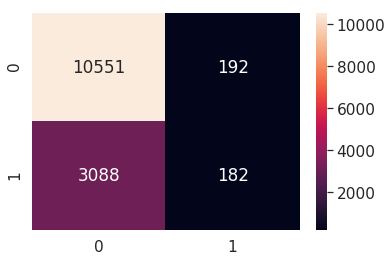

In [462]:
print('Test accuracy is {}'.format(accuracy_score(df_pred_merge1['flag_created'], df_pred_merge1['all_model_pred'])))
conf_mat = confusion_matrix(df_pred_merge1['flag_created'], df_pred_merge1['all_model_pred'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(df_pred_merge1['flag_created'],df_pred_merge1['all_model_pred']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred_merge1['flag_created'], df_pred_merge1['all_model_pred'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[3].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred_merge1['flag_created'], df_pred_merge1['all_model_pred']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [448]:
agreedperct=len(df_pred_merge[(df_pred_merge['all_model_pred']==0) & (df_pred_merge['label']=='agreed') ])/len(df_pred_merge[df_pred_merge['label']=='agreed'])  
addedperct=len(df_pred_merge[(df_pred['all_model_pred']==0) & (df_pred_merge['label']=='added') ])/len(df_pred_merge[df_pred_merge['label']=='added'])   
deletedperct=len(df_pred_merge[(df_pred_merge['all_model_pred']==1) & (df_pred_merge['label']=='deleted') ])/len(df_pred_merge[df_pred_merge['label']=='deleted'])   
print("agreed percentage: ",agreedperct)
print("added percentage: ",addedperct)
print("deleted percentage: ",deletedperct)

agreed percentage:  0.984453589391861
added percentage:  0.9519807923169268
deleted percentage:  0.0549079754601227


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Test accuracy is 0.748617708901176
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      9581
           1       0.55      0.05      0.10      3260

   micro avg       0.75      0.75      0.75     12841
   macro avg       0.65      0.52      0.48     12841
weighted avg       0.70      0.75      0.66     12841

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.748617708901176  0.55 0.05 0.10 9434 3081 147 179


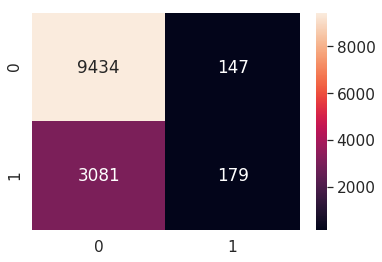

In [456]:
print('Test accuracy is {}'.format(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])))
conf_mat = confusion_matrix(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(df_pred_merge['flag_created'],df_pred_merge['all_model_pred']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[3].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['all_model_pred']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [449]:
len(df_pred_merge[df_pred_merge['label']=='agreed'])

8748

In [450]:
len(df_pred_merge[df_pred_merge['label']=='added'])

833

In [451]:
len(df_pred_merge[df_pred_merge['label']=='deleted'])

3260

In [445]:
df_pred_merge.columns

Index(['chart_id', 'code_id', 'start_offset', 'end_offset', 'Code_COPD_x',
       'Code_Cancer_x', 'Code_Cholesterol_x', 'Code_Depression_x',
       'Code_Diabetes_x', 'Code_Heart_x', 'Code_Kidney_x', 'Code_Model1_x',
       'Code_Model2_x', 'Code_Model3_x', 'DeletionReason_family_history_x',
       'DeletionReason_negation_x', 'DeletionReason_not_doctors_note_x',
       'DeletionReason_not_relevant_x',
       'DeletionReason_phoneORaddressORother_number_x',
       'DeletionReason_preventative_screening_x', 'Phrase_aneurysm_x',
       'Phrase_asthma_x', 'Phrase_cad_x', 'Phrase_cancer_x',
       'Phrase_cholesterol_x', 'Phrase_ckd_x', 'Phrase_dementia_x',
       'Phrase_depression_x', 'Phrase_diabetes_x', 'Phrase_emphysema_x',
       'Phrase_hypertension_x', 'Phrase_stroke_x', 'final_pred28models',
       'created_at', 'submission_id', 'user_id', 'diagnosis_id', 'isActive',
       'status', 'ai', 'annotation_id', 'deleted', 'deleted_reason',
       'evidence', 'selectedText', 'text', '7

In [354]:
print(df_pred['chart_id'].nunique())
print(datalabel['chart_id'].nunique())
print(df_pred_merge['chart_id'].nunique())

813
913
775


In [355]:
df_pred_merge.head()

,chart_id,code_id,start_offset,end_offset,Code_COPD_x,Code_Cancer_x,Code_Cholesterol_x,Code_Depression_x,Code_Diabetes_x,Code_Heart_x,...,Phrase_ckd_y,Phrase_depression_y,Phrase_diabetes_y,DeletionReason_family_history_y,DeletionReason_negation_y,DeletionReason_not_doctors_note_y,DeletionReason_not_relevant_y,DeletionReason_phoneORaddressORother_number_y,DeletionReason_preventative_screening_y,all_model_pred
0,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,3484,3490,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E049,10293,10299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,3509,3538,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,E785,10318,10347,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,IBXRMA2018_MULT_1163238880010001_HMK_186149391...,I10,3419,3422,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [356]:
df_pred_merge.columns

Index(['chart_id', 'code_id', 'start_offset', 'end_offset', 'Code_COPD_x',
       'Code_Cancer_x', 'Code_Cholesterol_x', 'Code_Depression_x',
       'Code_Diabetes_x', 'Code_Heart_x', 'Code_Kidney_x', 'Code_Model1_x',
       'Code_Model2_x', 'Code_Model3_x', 'DeletionReason_family_history_x',
       'DeletionReason_negation_x', 'DeletionReason_not_doctors_note_x',
       'DeletionReason_not_relevant_x',
       'DeletionReason_phoneORaddressORother_number_x',
       'DeletionReason_preventative_screening_x', 'Phrase_aneurysm_x',
       'Phrase_asthma_x', 'Phrase_cad_x', 'Phrase_cancer_x',
       'Phrase_cholesterol_x', 'Phrase_ckd_x', 'Phrase_dementia_x',
       'Phrase_depression_x', 'Phrase_diabetes_x', 'Phrase_emphysema_x',
       'Phrase_hypertension_x', 'Phrase_stroke_x', 'final_pred28models',
       'created_at', 'submission_id', 'user_id', 'diagnosis_id', 'isActive',
       'status', 'ai', 'annotation_id', 'deleted', 'deleted_reason',
       'evidence', 'selectedText', 'text', '7

In [357]:
df_pred_merge_sel=df_pred_merge[['all_model_pred','final_pred28models']]

In [358]:
# it's either the 0 1 are reversed or there's a mistake, but I checked above, each prediction and 
abs(df_pred_merge_sel['all_model_pred']-df_pred_merge_sel['final_pred28models']).sum()

114

In [359]:
difference_ratio_4combined_pred=abs(df_pred_merge_sel['all_model_pred']-df_pred_merge_sel['final_pred28models']).sum()/(len(df_pred_merge_sel))
print("for combined prediction, the difference ratio no percentage is: ",difference_ratio_4combined_pred) # 0.8 percent

for combined prediction, the difference ratio no percentage is:  0.008877813254419437


In [360]:
model_list=['Phrase_stroke',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_dementia',
       'Phrase_cholesterol', 'Phrase_cad', 'Phrase_aneurysm', 'Code_COPD',
       'Code_Depression', 'Code_Diabetes', 'Code_Heart', 'Code_Kidney',
       'Code_Model1', 'Code_Cancer', 'Code_Cholesterol', 'Code_Model2',
       'Code_Model3', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_asthma',
       'Phrase_cancer', 'Phrase_ckd', 'Phrase_depression', 'Phrase_diabetes']
len(model_list)

28

In [361]:
def comp_pred_model(model_name):
    model_x=model_name+'_x'   # from pipeline
    model_y=model_name+'_y'   # local result
    p_pred=df_pred_merge[model_x]
    l_pred=df_pred_merge[model_y]    
    differenceratio=abs(p_pred-l_pred).sum()*100/((sum(~np.isnan(l_pred))+(sum(~np.isnan(l_pred)))/2))
    return differenceratio

In [362]:
for i in model_list:
    difratio=comp_pred_model(i)
    print("for model: ",i)
    print("difference ratio is:   %",difratio)

for model:  Phrase_stroke
difference ratio is:   % 0.0
for model:  Phrase_emphysema
difference ratio is:   % 0.0
for model:  Phrase_hypertension
difference ratio is:   % 0.0
for model:  Phrase_dementia
difference ratio is:   % 0.0
for model:  Phrase_cholesterol
difference ratio is:   % 0.0
for model:  Phrase_cad
difference ratio is:   % 0.0
for model:  Phrase_aneurysm
difference ratio is:   % 0.0
for model:  Code_COPD
difference ratio is:   % 0.9316770186335404
for model:  Code_Depression
difference ratio is:   % 0.0
for model:  Code_Diabetes
difference ratio is:   % 3.766478342749529
for model:  Code_Heart
difference ratio is:   % 2.4242424242424243
for model:  Code_Kidney
difference ratio is:   % 0.0
for model:  Code_Model1
difference ratio is:   % 0.3790815886964763
for model:  Code_Cancer
difference ratio is:   % 6.0606060606060606
for model:  Code_Cholesterol
difference ratio is:   % 0.4065040650406504
for model:  Code_Model2
difference ratio is:   % 1.014177791576115
for model:  

#### Part 4. b. Merge probability result from my computation and AM's pipeline result

In [363]:
df_prob.columns

Index(['chart_id', 'created_at', 'submission_id', 'user_id', 'code_id',
       'diagnosis_id', 'isActive', 'status', 'ai', 'annotation_id', 'deleted',
       'deleted_reason', 'end_offset', 'evidence', 'selectedText',
       'start_offset', 'text', '75bef', '75aft', '25wordsbef', '25wordsaft',
       'label', '75char', 'text75', 'cleaned_data', 'index', 'Phrase_stroke',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_dementia',
       'Phrase_cholesterol', 'Phrase_cad', 'Phrase_aneurysm', 'Code_COPD',
       'Code_Depression', 'Code_Diabetes', 'Code_Heart', 'Code_Kidney',
       'Code_Model1', 'Code_Cancer', 'Code_Cholesterol', 'Code_Model2',
       'Code_Model3', 'Phrase_asthma', 'Phrase_cancer', 'Phrase_ckd',
       'Phrase_depression', 'Phrase_diabetes', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preve

In [364]:
dataprob.columns

Index(['chart_id', 'code_id', 'start_offset', 'end_offset', 'Code_COPD',
       'Code_Cancer', 'Code_Cholesterol', 'Code_Depression', 'Code_Diabetes',
       'Code_Heart', 'Code_Kidney', 'Code_Model1', 'Code_Model2',
       'Code_Model3', 'DeletionReason_family_history',
       'DeletionReason_negation', 'DeletionReason_not_doctors_note',
       'DeletionReason_not_relevant',
       'DeletionReason_phoneORaddressORother_number',
       'DeletionReason_preventative_screening', 'Phrase_aneurysm',
       'Phrase_asthma', 'Phrase_cad', 'Phrase_cancer', 'Phrase_cholesterol',
       'Phrase_ckd', 'Phrase_dementia', 'Phrase_depression', 'Phrase_diabetes',
       'Phrase_emphysema', 'Phrase_hypertension', 'Phrase_stroke'],
      dtype='object', name='model_name')

In [365]:
print(len(df_prob))
print(len(dataprob))  # number of rows is different, so there will be some merging or matching needed

29124
15875


In [366]:
# now the data frame with predictions
df_prob_merge = pd.merge(dataprob,df_prob, how='inner', on = ['chart_id','code_id','start_offset','end_offset'])
print(len(df_prob_merge))  # so after merging, more rows generated

12841


In [367]:
df_prob_merge.columns

Index(['chart_id', 'code_id', 'start_offset', 'end_offset', 'Code_COPD_x',
       'Code_Cancer_x', 'Code_Cholesterol_x', 'Code_Depression_x',
       'Code_Diabetes_x', 'Code_Heart_x', 'Code_Kidney_x', 'Code_Model1_x',
       'Code_Model2_x', 'Code_Model3_x', 'DeletionReason_family_history_x',
       'DeletionReason_negation_x', 'DeletionReason_not_doctors_note_x',
       'DeletionReason_not_relevant_x',
       'DeletionReason_phoneORaddressORother_number_x',
       'DeletionReason_preventative_screening_x', 'Phrase_aneurysm_x',
       'Phrase_asthma_x', 'Phrase_cad_x', 'Phrase_cancer_x',
       'Phrase_cholesterol_x', 'Phrase_ckd_x', 'Phrase_dementia_x',
       'Phrase_depression_x', 'Phrase_diabetes_x', 'Phrase_emphysema_x',
       'Phrase_hypertension_x', 'Phrase_stroke_x', 'created_at',
       'submission_id', 'user_id', 'diagnosis_id', 'isActive', 'status', 'ai',
       'annotation_id', 'deleted', 'deleted_reason', 'evidence',
       'selectedText', 'text', '75bef', '75aft', '25wor

In [368]:
df_prob_merge['chart_id'].nunique()

775

In [369]:
def comp_prob_model(model_name):
    model_x=model_name+'_x'   # from pipeline
    model_y=model_name+'_y'   # local result
    T1=(df_prob_merge[model_x]>0.5).tolist()
    p_prob = np.array([int(x) for x in T1])  # pipeline
    p_sum=p_prob.sum()
    T1=(df_prob_merge[model_y]>0.5).tolist()
    l_prob = np.array([int(x) for x in T1])  #local
    l_sum=l_prob.sum()    
    differenceratio=abs(p_sum-l_sum).sum()*100/((sum(~np.isnan(df_prob_merge[model_x]))+(sum(~np.isnan(df_prob_merge[model_y])))/2))
    return differenceratio
    

In [370]:
for i in model_list:
    difratio=comp_prob_model(i)
    print("for model: ",i)
    print("difference ratio is: ",difratio)

for model:  Phrase_stroke
difference ratio is:  0.0
for model:  Phrase_emphysema
difference ratio is:  0.0
for model:  Phrase_hypertension
difference ratio is:  0.05085176709890669
for model:  Phrase_dementia
difference ratio is:  0.0
for model:  Phrase_cholesterol
difference ratio is:  0.0
for model:  Phrase_cad
difference ratio is:  0.0
for model:  Phrase_aneurysm
difference ratio is:  0.0
for model:  Code_COPD
difference ratio is:  0.9316770186335404
for model:  Code_Depression
difference ratio is:  0.0
for model:  Code_Diabetes
difference ratio is:  3.766478342749529
for model:  Code_Heart
difference ratio is:  2.4242424242424243
for model:  Code_Kidney
difference ratio is:  0.0
for model:  Code_Model1
difference ratio is:  0.3790815886964763
for model:  Code_Cancer
difference ratio is:  6.0606060606060606
for model:  Code_Cholesterol
difference ratio is:  0.43360433604336046
for model:  Code_Model2
difference ratio is:  1.055572803477181
for model:  Code_Model3
difference ratio is

#### Example of different probability from above

In [388]:
model_list

['Phrase_stroke',
 'Phrase_emphysema',
 'Phrase_hypertension',
 'Phrase_dementia',
 'Phrase_cholesterol',
 'Phrase_cad',
 'Phrase_aneurysm',
 'Code_COPD',
 'Code_Depression',
 'Code_Diabetes',
 'Code_Heart',
 'Code_Kidney',
 'Code_Model1',
 'Code_Cancer',
 'Code_Cholesterol',
 'Code_Model2',
 'Code_Model3',
 'DeletionReason_family_history',
 'DeletionReason_negation',
 'DeletionReason_not_doctors_note',
 'DeletionReason_not_relevant',
 'DeletionReason_phoneORaddressORother_number',
 'DeletionReason_preventative_screening',
 'Phrase_asthma',
 'Phrase_cancer',
 'Phrase_ckd',
 'Phrase_depression',
 'Phrase_diabetes']

In [337]:
def comp_prob_sidebyside(model_name):
    model_x=model_name+'_x'   # from pipeline
    model_y=model_name+'_y'   # local result
    notnulllist=df_prob_merge[~df_prob_merge[model_x].isnull()].index.tolist()
    #df_prob_merge[['Code_Cancer_x','Code_Cancer_y']].iloc[notnulllist]
    return df_prob_merge[[model_x,model_y]].iloc[notnulllist]

In [398]:
comp_prob_sidebyside(model_list[2])

,Phrase_hypertension_x,Phrase_hypertension_y
7,0.01,0.014750
8,0.04,0.042171
25,0.02,0.024379
27,0.02,0.024379
29,0.03,0.026782
31,0.02,0.024379
33,0.02,0.021512
41,0.05,0.054275
43,0.12,0.115250
44,0.02,0.018740


#### Sub task: selecting 50 charts to compare the probability

In [408]:
# selecting the charts for further comparison
sel1=df_prob_merge[~df_prob_merge['Code_Cancer_x'].isnull()]   #.index.tolist()
print(sel1['chart_id'].nunique())
chartsel0=sel1['chart_id'].unique()
print(chartsel0)

4
['IBXRMA2018_MULT_1216842840010001_HMK_206169800A_LUCY_NOVITSKI_002812690_2017'
 'IBXRMA2018_MULT_1216953710010001_HMK_211240257A_DOLORES_MILLER_002812309_2017'
 'IBXRMA2018_MULT_1217906400010002_HMK_186362445B_FRANCES_HOLLOMAN_003141780_2017'
 'IBXRMA2018_MULT_1217987500010001_HMK_519588835A_ROSEMARY_REINKE_002884607_2017']


In [404]:
sel2=df_prob_merge[~df_prob_merge['Phrase_hypertension_x'].isnull()]   #.index.tolist()
print(sel2['chart_id'].nunique())
P_h_chartlist=sel2['chart_id'].unique()
ph10_sel=random.sample(range(len(P_h_chartlist)), 10) 
chartsel1=P_h_chartlist[ph10_sel]
print(chartsel1)

544
['IBXRMA2018_MULT_1216995270010001_HMK_173288941A_SOPHIE_SMOCZYLO_002812690_2017'
 'IBXRMA2018_MULT_1217968580010001_HMK_210304691A_FRANK_PILEGGI_002804549_2017'
 'IBXRMA2018_MULT_1217790680010001_HMK_191286532A_OWEN_VANDINE_002821152_2017'
 'IBXRMA2018_MULT_1217953550010001_HMK_187284122A_LOIS_SULLIVAN_002822933_2017'
 'IBXRMA2018_MULT_1217097040010001_HMK_179268365A_JOAN_MURPHY_002813219_2017'
 'IBXRMA2018_MULT_1217365620010001_HMK_173409607A_JOHN_STAROPOLI_002811512_2017'
 'IBXRMA2018_MULT_1217100050010001_HMK_383349435A_BARBARA_SCHULTZ_002811162_2017'
 'IBXRMA2018_MULT_1216878900010001_HMK_201287162A_RICHARD_BISHOP_002804651_2017'
 'IBXRMA2018_MULT_1218002650010001_HMK_194424614A_ALEXANDER_KALMAN_002819694_2017'
 'IBXRMA2018_MULT_1217104970010001_HMK_207145933A_RUTH_KAPLAN_002808835_2017']


In [406]:
sel3=df_prob_merge[~df_prob_merge['Code_Diabetes_x'].isnull()]   #.index.tolist()
print(sel3['chart_id'].nunique())
C_D_chartlist=sel3['chart_id'].unique()
cd10_sel=random.sample(range(len(C_D_chartlist)), 10) 
chartsel2=C_D_chartlist[cd10_sel]
print(chartsel2)

122
['IBXRMA2018_MULT_1204748800010001_HMK_165461743A_LINDA_BOGART_002885798_2017'
 'IBXRMA2018_MULT_1216105580010001_HMK_167465772A_DANIEL_GORMLEY_002810144_2017'
 'IBXRMA2018_MULT_1217988000010001_HMK_188280010A_LEROY_BAYNE_002821770_2017'
 'IBXRMA2018_MULT_1218030130010001_HMK_198345910A_JAMES_FREEH_002812309_2017'
 'IBXRMA2018_MULT_1216976260010001_HMK_3DT5G37VM82_BARBARA_CAHOONE_002816956_2017'
 'IBXRMA2018_MULT_1217858120010001_HMK_186346135B_PHYLLIS_LILES_002885798_2017'
 'IBXRMA2018_MULT_1216981020010001_HMK_5KT1X18YD15_CATHERINE_JASPER_002804905_2017'
 'IBXRMA2018_MULT_1217371990010001_HMK_170305783B_ROSE_BORIS_002812690_2017'
 'IBXRMA2018_MULT_1217020950010001_HMK_172429345A_EILEEN_CORNINE_003432502_2017'
 'IBXRMA2018_MULT_1163441230010001_HMK_161281868A_NICHOLAS_DAVERSO_002804970_2017']


In [409]:
sel4=df_prob_merge[~df_prob_merge['Phrase_cancer_x'].isnull()]   #.index.tolist()
print(sel4['chart_id'].nunique())
chartsel3=sel4['chart_id'].unique()
print(chartsel3)

14
['IBXRMA2018_MULT_1164213900010001_HMK_3GV7VC6CR20_SUSAN_MANDEVILLE_002813144_2017'
 'IBXRMA2018_MULT_1216097800010001_HMK_100306772A_WILLIAM_BUTTNER_002812501_2017'
 'IBXRMA2018_MULT_1216953710010001_HMK_211240257A_DOLORES_MILLER_002812309_2017'
 'IBXRMA2018_MULT_1217078910010001_HMK_182305389A_JOHN_GARNER_002817567_2017'
 'IBXRMA2018_MULT_1217111150010001_HMK_203300397A_SHIRLEY_WOLFGANG_002811508_2017'
 'IBXRMA2018_MULT_1217361730010001_HMK_159268844A_JERRY_FELDMAN_003396944_2017'
 'IBXRMA2018_MULT_1217422070010001_HMK_172261099A_KENNETH_LEWIS_002822386_2017'
 'IBXRMA2018_MULT_1217441160010001_HMK_162443938A_REINHOLD_BADER_002804508_2017'
 'IBXRMA2018_MULT_1217627830010001_HMK_166349476A_JOAN_LARUE_002804508_2017'
 'IBXRMA2018_MULT_1217817930010001_HMK_195364117A_JOAN_HALDEMAN_002821218_2017'
 'IBXRMA2018_MULT_1217909080010001_HMK_209302423A_JOHN_CORRIGAN_003396944_2017'
 'IBXRMA2018_MULT_1218035670010001_HMK_519489959A_RONALD_YOUNG_003102386_2017'
 'IBXRMA2018_MULT_12180357400100

In [417]:
combinesel_list=(np.concatenate((chartsel0, chartsel1,chartsel2,chartsel3), axis=0)).tolist()
print(combinesel_list)

['IBXRMA2018_MULT_1216842840010001_HMK_206169800A_LUCY_NOVITSKI_002812690_2017', 'IBXRMA2018_MULT_1216953710010001_HMK_211240257A_DOLORES_MILLER_002812309_2017', 'IBXRMA2018_MULT_1217906400010002_HMK_186362445B_FRANCES_HOLLOMAN_003141780_2017', 'IBXRMA2018_MULT_1217987500010001_HMK_519588835A_ROSEMARY_REINKE_002884607_2017', 'IBXRMA2018_MULT_1216995270010001_HMK_173288941A_SOPHIE_SMOCZYLO_002812690_2017', 'IBXRMA2018_MULT_1217968580010001_HMK_210304691A_FRANK_PILEGGI_002804549_2017', 'IBXRMA2018_MULT_1217790680010001_HMK_191286532A_OWEN_VANDINE_002821152_2017', 'IBXRMA2018_MULT_1217953550010001_HMK_187284122A_LOIS_SULLIVAN_002822933_2017', 'IBXRMA2018_MULT_1217097040010001_HMK_179268365A_JOAN_MURPHY_002813219_2017', 'IBXRMA2018_MULT_1217365620010001_HMK_173409607A_JOHN_STAROPOLI_002811512_2017', 'IBXRMA2018_MULT_1217100050010001_HMK_383349435A_BARBARA_SCHULTZ_002811162_2017', 'IBXRMA2018_MULT_1216878900010001_HMK_201287162A_RICHARD_BISHOP_002804651_2017', 'IBXRMA2018_MULT_1218002650010

In [421]:
finallist=list(set(combinesel_list))
print(len(set(combinesel_list)))
print(len(finallist))

37
37


In [422]:
df = pd.DataFrame(data={"chart_id": finallist })
df.to_csv("sel37_chartlist.csv", sep=',',index=False)

### Part 5. Compute the model accuracy 

In [ ]:
# unfortunately I deleted the flag, but recreate the flags from 'label', this is the target or true value
# then use 'final_pred28models' which is from pipeline and 'all_model_pred' which is from local computation

In [308]:
df_pred_merge['label'].unique()

array(['agreed', 'deleted', 'added'], dtype=object)

In [372]:
df_pred_merge['label'].value_counts()

agreed     8748
deleted    3260
added       833
Name: label, dtype: int64

In [374]:
df_pred_merge['flag_created']= [0 if (df_pred_merge['label'].iloc[i]=='agreed')|(df_pred_merge['label'].iloc[i]=='added') else 1 for i in range(len(df_pred_merge))]

In [375]:
df_pred_merge['flag_created'].unique()

array([0, 1])

In [376]:
df_pred_merge['flag_created'].value_counts()

0    9581
1    3260
Name: flag_created, dtype: int64

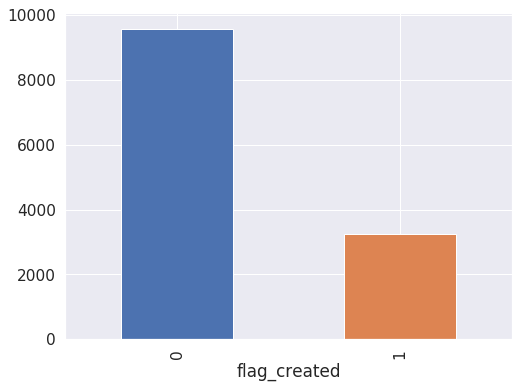

flag_created
0    9581
1    3260
dtype: int64

In [377]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_pred_merge.groupby('flag_created').label.count().plot.bar(ylim=0)
plt.show()
df_pred_merge.groupby(['flag_created']).size()  

Test accuracy is 0.7507982244373491
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      9581
           1       0.64      0.04      0.08      3260

   micro avg       0.75      0.75      0.75     12841
   macro avg       0.70      0.52      0.47     12841
weighted avg       0.72      0.75      0.66     12841

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.7507982244373491  0.75 0.99 0.86 9505 3124 76 136


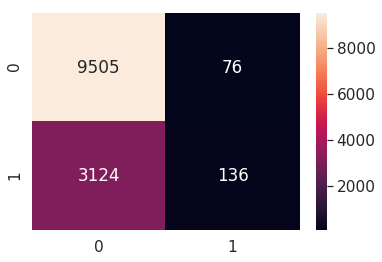

In [378]:
# comparing pipeline result with the flag
#accuracy_score(y_true, y_pred,...)
print('Test accuracy is {}'.format(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['final_pred28models'])))
#confusion_matrix(y_true, y_pred,...)
conf_mat = confusion_matrix(df_pred_merge['flag_created'], df_pred_merge['final_pred28models'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
#classification_report(y_true, y_pred)
print(classification_report(df_pred_merge['flag_created'],df_pred_merge['final_pred28models']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred_merge['flag_created'], df_pred_merge['final_pred28models'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[2].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['final_pred28models']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [385]:
# here 1 is agreed/added  0 is deleted
all_TP=9505 
all_FN=3124
all_FP=76
all_TN=3000
precision= all_TP/(all_FP+all_TP)
recall=all_TP/(all_FN+all_TP)
accuracy=(all_TN+all_TP)/(all_TN+all_TP+all_FN+all_FP) 
print(recall)
print(precision)
print(accuracy)

0.7526328292026289
0.9920676338586787
0.7962432346386501


Test accuracy is 0.748617708901176
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      9581
           1       0.55      0.05      0.10      3260

   micro avg       0.75      0.75      0.75     12841
   macro avg       0.65      0.52      0.48     12841
weighted avg       0.70      0.75      0.66     12841

accuracy_score recall precision  f1_score tn  fn  fp  tp
0.748617708901176  0.75 0.98 0.85 9434 3081 147 179


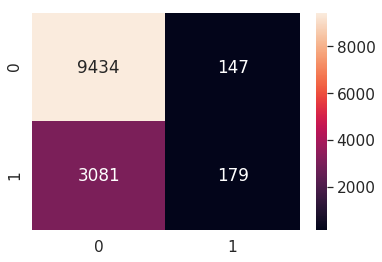

In [379]:
# comparing with local computation

print('Test accuracy is {}'.format(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])))
conf_mat = confusion_matrix(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d')
print(classification_report(df_pred_merge['flag_created'],df_pred_merge['all_model_pred']))


#conf_mat = confusion_matrix(test_y, allpredict1)
tn, fp, fn, tp = conf_mat.ravel()
report = classification_report(df_pred_merge['flag_created'], df_pred_merge['all_model_pred'])
lines = report.split('\n')
    #print(lines[2])
row_data = lines[2].split('      ')
print("accuracy_score recall precision  f1_score tn  fn  fp  tp")
print(accuracy_score(df_pred_merge['flag_created'], df_pred_merge['all_model_pred']),row_data[2],row_data[3],row_data[4], tn, fn, fp, tp)

In [380]:
#df_pred_merge.to_csv('df_pred_merge_4comp_0508.csv')
#df_prob_merge.to_csv('df_prob_merge_4comp_0508.csv')

In [381]:
# save a html copy
!jupyter nbconvert --to html all28refreshedmodels_comptoAMresult_050819-deleteinstances.ipynb

[NbConvertApp] Converting notebook all28refreshedmodels_comptoAMresult_050819-deleteinstances.ipynb to html
[NbConvertApp] Writing 684612 bytes to all28refreshedmodels_comptoAMresult_050819-deleteinstances.html
